A primer on numerical differentiation
========================

In order to numerically evaluate a derivative $y'(x)=dy/dx$ at point $x_0$, we approximate is by using finite differences:
Therefore we find: 

$dx \approx \Delta x =x_1-x_0$

$dy \approx \Delta y =y_1-y_0= y(x_1)-y(x_0) = y(x_0+\Delta_x)-y(x_0)$

Then we re-write the derivative in terms of discrete differences as:
$$\frac{dy}{dx} \approx \frac{\Delta y}{\Delta x}$$

#### Example

Let's look at the accuracy of this approximation in terms of the interval $\Delta x$. In our first example we will evaluate the derivative of $y=x^2$ at $x=1$.

In [7]:
dx, x = 1, 1
while(dx > 1e-10):
    dy = (x+dx)**2 - x**2
    d = dy / dx
    print("dx = %20.16f, d = %20.16f, err = %20.16f" % (dx, d, d-2))
    dx = dx / 10

dx =   1.0000000000000000, d =   3.0000000000000000, err =   1.0000000000000000
dx =   0.1000000000000000, d =   2.1000000000000019, err =   0.1000000000000019
dx =   0.0100000000000000, d =   2.0100000000000007, err =   0.0100000000000007
dx =   0.0010000000000000, d =   2.0009999999996975, err =   0.0009999999996975
dx =   0.0001000000000000, d =   2.0000999999991720, err =   0.0000999999991720
dx =   0.0000100000000000, d =   2.0000100000139298, err =   0.0000100000139298
dx =   0.0000010000000000, d =   2.0000009999243669, err =   0.0000009999243669
dx =   0.0000001000000000, d =   2.0000001010878061, err =   0.0000001010878061
dx =   0.0000000100000000, d =   1.9999999878450576, err =  -0.0000000121549424
dx =   0.0000000010000000, d =   2.0000001654807416, err =   0.0000001654807416
dx =   0.0000000001000000, d =   2.0000001654807416, err =   0.0000001654807416


Why is it that the sequence does not converge? This is due to the round-off errors in the representation of the floating point numbers. To see this, we can simply type:

In [8]:
((1+0.0001)*(1+0.0001) - 1*1)

0.0002000099999999172

Let's try using powers of 1/2

In [9]:
dx, x = 1, 1
while(dx > 1e-10):
    dy = (x+dx)**2 - x**2
    d = dy / dx
    print("dx = %20.16f, d = %20.16f, err = %20.16f" % (dx, d, d-2))
    dx = dx / 2

dx =   1.0000000000000000, d =   3.0000000000000000, err =   1.0000000000000000
dx =   0.5000000000000000, d =   2.5000000000000000, err =   0.5000000000000000
dx =   0.2500000000000000, d =   2.2500000000000000, err =   0.2500000000000000
dx =   0.1250000000000000, d =   2.1250000000000000, err =   0.1250000000000000
dx =   0.0625000000000000, d =   2.0625000000000000, err =   0.0625000000000000
dx =   0.0312500000000000, d =   2.0312500000000000, err =   0.0312500000000000
dx =   0.0156250000000000, d =   2.0156250000000000, err =   0.0156250000000000
dx =   0.0078125000000000, d =   2.0078125000000000, err =   0.0078125000000000
dx =   0.0039062500000000, d =   2.0039062500000000, err =   0.0039062500000000
dx =   0.0019531250000000, d =   2.0019531250000000, err =   0.0019531250000000
dx =   0.0009765625000000, d =   2.0009765625000000, err =   0.0009765625000000
dx =   0.0004882812500000, d =   2.0004882812500000, err =   0.0004882812500000
dx =   0.0002441406250000, d =   2.00024

In addition, one could consider the midpoint difference, defined as:
$$ dy \approx \Delta y = y(x_0+\frac{\Delta_x}{2})-y(x_0-\frac{\Delta_x}{2}).$$

For a more complex function we need to import it from the math module. For instance, let's calculate the derivative of $sin(x)$ at $x=\pi/4$, including both the forward and midpoint differences.

In [19]:
from math import sin, sqrt, pi
dx = 1.
while(dx > 1.e-10):
    x = pi/4.
    d1 = sin(x+dx) - sin(x) # "forward" difference
    d2 = sin(x+dx/2.) - sin(x-dx/2.) # "central" difference
    d1, d2 = d1 / dx, d2 / dx 
    print("%8.5e %20.16f %20.16f %20.16f %20.16f" % (dx, d1, d1-sqrt(2)/2, d2, d2-sqrt(2)/2))
    dx = dx / 2

1.00000e+00   0.2699544827129282  -0.4371522984736194   0.6780100988420897  -0.0290966823444578
5.00000e-01   0.5048856975964859  -0.2022210835900616   0.6997640691250939  -0.0073427120614536
2.50000e-01   0.6118351194488110  -0.0952716617377366   0.7052667953545546  -0.0018399858319930
1.25000e-01   0.6611301360648314  -0.0459766451217162   0.7066465151141266  -0.0004602660724210
6.25000e-02   0.6845566203276618  -0.0225501608588857   0.7069916978116630  -0.0001150833748845
3.12500e-02   0.6959440534591259  -0.0111627277274217   0.7070780092891873  -0.0000287718973603
1.56250e-02   0.7015538499518499  -0.0055529312346977   0.7070995881463489  -0.0000071930401987
7.81250e-03   0.7043374663312676  -0.0027693148552800   0.7071049829223881  -0.0000017982641595
3.90625e-03   0.7057239167465070  -0.0013828644400405   0.7071063316202526  -0.0000004495662950
1.95312e-03   0.7064157978737740  -0.0006909833127736   0.7071066687949497  -0.0000001123915979
9.76562e-04   0.7067614018394579  -0.000

What do you notice? Which one does better?

A more in-depth discussion about round-off errors in numerical differentiation can be found <a href="http://www.uio.no/studier/emner/matnat/math/MAT-INF1100/h10/kompendiet/kap11.pdf">here</a>

### Special functions in **numpy**

numpy provides a simple method **diff()** to calculate the numerical derivatives of a dataset stored in an array by forward differences. The function **gradient()** will calculate the derivatives by midpoint (or central) difference, that provides a more accurate result. 

In [30]:
x1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

[ 1.  2.  4.  6.  8. 10. 12. 14. 16. 17.]


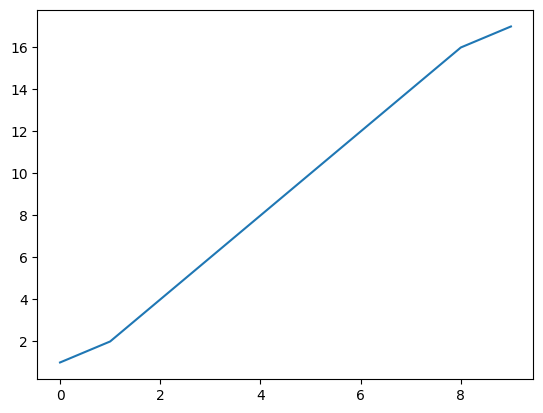

In [32]:
import numpy as np 
from matplotlib import pyplot as plt

y = lambda x: x**2 

x1 = np.arange(0, 10, 1)

y1 = np.gradient(y(x1))
print(y1)

plt.plot(x1, np.gradient(y(x1)))

In [25]:
x1

array([ 0.,  2.,  4.,  6.,  8., 10.])

Notice above that **gradient()** uses forward and backward differences at the two ends.

More discussion about numerical differentiation, including higher order methods with error extrapolation can be found <a href="http://young.physics.ucsc.edu/115/diff.pdf">here</a>. 

The module **scipy** also includes methods to accurately calculate derivatives:

In [36]:
from scipy.misc import derivative

y = lambda x: x**2

dx, x = 1, 1

while(dx > 1.e-10):
    d = derivative(y, x, dx)
    print("dx = %20.16f, d = %20.16f, err = %20.16f" % (dx, d, d-2))
    dx = dx / 10

dx =   1.0000000000000000, d =   2.0000000000000000, err =   0.0000000000000000
dx =   0.1000000000000000, d =   2.0000000000000004, err =   0.0000000000000004
dx =   0.0100000000000000, d =   2.0000000000000018, err =   0.0000000000000018
dx =   0.0010000000000000, d =   1.9999999999998352, err =  -0.0000000000001648
dx =   0.0001000000000000, d =   1.9999999999992246, err =  -0.0000000000007754
dx =   0.0000100000000000, d =   2.0000000000020002, err =   0.0000000000020002
dx =   0.0000010000000000, d =   2.0000000000019997, err =   0.0000000000019997
dx =   0.0000001000000000, d =   2.0000000000575109, err =   0.0000000000575109
dx =   0.0000000100000000, d =   1.9999999933961727, err =  -0.0000000066038273
dx =   0.0000000010000000, d =   2.0000000544584391, err =   0.0000000544584391
dx =   0.0000000001000000, d =   2.0000001654807416, err =   0.0000001654807416


/var/folders/wz/s4rx21_137g79thgtc1s1k3m0000gn/T/ipykernel_2109/12657976.py:8: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d = derivative(y, x, dx)


One way to improve the roundoff errors is by simply using the **decimal** package

In [38]:
from decimal import Decimal

dx = Decimal('1.')
while( dx >= Decimal("1.e-10")):
    x = Decimal("1.")
    dy = (x+dx)**2 - x**2
    d = dy / dx 
    print("dx = %20.16f, d = %20.16f, err = %20.16f" % (dx, d, d-2))
    dx = dx / Decimal("10.")

dx =   1.0000000000000000, d =   3.0000000000000000, err =   1.0000000000000000
dx =   0.1000000000000000, d =   2.1000000000000001, err =   0.1000000000000000
dx =   0.0100000000000000, d =   2.0099999999999998, err =   0.0100000000000000
dx =   0.0010000000000000, d =   2.0009999999999999, err =   0.0010000000000000
dx =   0.0001000000000000, d =   2.0001000000000002, err =   0.0001000000000000
dx =   0.0000100000000000, d =   2.0000100000000001, err =   0.0000100000000000
dx =   0.0000010000000000, d =   2.0000010000000001, err =   0.0000010000000000
dx =   0.0000001000000000, d =   2.0000000999999998, err =   0.0000001000000000
dx =   0.0000000100000000, d =   2.0000000099999999, err =   0.0000000100000000
dx =   0.0000000010000000, d =   2.0000000010000001, err =   0.0000000010000000
dx =   0.0000000001000000, d =   2.0000000001000000, err =   0.0000000001000000


# Automatic Differentiation

Even better than numerical differentiation is automatic differentiation or *autodiff*, which is crucial to breakthroughs in machine learning.

This is a technique that allows to evaluate the derivative of a function to machine precision, without the need to use finite differences, using the fact that autodiff package knows the analytical form of the derivative for certain functions. It then builds a computational graph that allows for the evaluation of the derivative of a function using the chain rule.

In [42]:
import jax 
import jax.numpy as jnp
from jax import grad

In [41]:
f = lambda x: x**2

In [43]:
grad_f = jax.grad(f)

In [47]:
x = 13.0
print("The gradient of f at x = %.2f is %.16f" % (x, grad_f(x)))

The gradient of f at x = 13.00 is 26.0000000000000000


Now compare this to the finite difference technique

In [49]:
dx, x = 1, 13
while(dx > 1.e-10):
    dy = (x+dx)**2 - x**2
    d = dy / dx
    print("dx = %20.16f, d = %20.16f, err = %20.16f" % (dx, d, d-2*x))
    dx = dx / 10

dx =   1.0000000000000000, d =  27.0000000000000000, err =   1.0000000000000000
dx =   0.1000000000000000, d =  26.0999999999998522, err =   0.0999999999998522
dx =   0.0100000000000000, d =  26.0099999999994225, err =   0.0099999999994225
dx =   0.0010000000000000, d =  26.0009999999795127, err =   0.0009999999795127
dx =   0.0001000000000000, d =  26.0000999998055704, err =   0.0000999998055704
dx =   0.0000100000000000, d =  26.0000099984836162, err =   0.0000099984836162
dx =   0.0000010000000000, d =  26.0000009859595558, err =   0.0000009859595558
dx =   0.0000001000000000, d =  25.9999998775128844, err =  -0.0000001224871156
dx =   0.0000000100000000, d =  26.0000035723351139, err =   0.0000035723351139
dx =   0.0000000010000000, d =  26.0000092566769965, err =   0.0000092566769965
dx =   0.0000000001000000, d =  25.9998955698392749, err =  -0.0001044301607251


There is no error on the autodiff result because it knows $dy/dx$ as a *function*, rather than computing it by numerical approximation

Ok, so that's great and all, but autodiff really gets its legs when you have a more complicated function. Derivatives of a more complicated function that is composed of many smaller functions require many applications of the chain rule. Autodiff does this for you.

In [50]:
def f_complicated(x):
    return jnp.cos(jnp.sin(jnp.tanh(x)))

In [51]:
grad_fcomp = grad(f_complicated)

In [52]:
grad_fcomp(1.0)

Array(-0.19349389, dtype=float32, weak_type=True)

Some of the most complicated functions out there are called *neural networks* which can involve millions or billions of smaller functions or *neurons* in the composition. Autodiff also works on them, which is one of the crucial reasons there has been so much progress in AI in the last 10 years. 

Let's recall our simple neural network architecture that we studied prevously, a feedforward neural network of depth $3$. The equation defining the network is given by:

$$\mathbf{y} = \mathbf{W}_3\sigma(\mathbf{W}_2\sigma(\mathbf{W}_1\mathbf{x}+\mathbf{b}_1)+\mathbf{b}_2)+\mathbf{b}_3$$

where $\mathbf{x}$ is the input vector, $\mathbf{y}$ is the neural network prediction, $\mathbf{W}_i$ and $\mathbf{b}_i$ are the weight matrices and bias vectors of the network, and $\sigma$ is the non-linear activation function. Recall that the weights and biases are the parameters that are updated when the network is trained to do something useful.

So why is autodiff important here? This function looks complicated, but it's just a composition of affine transformations and elementwise non-linearities. We know the derivative of each of these functions, so we can use the chain rule to compute the derivative of the entire network, which is crucial for training. For functions that are compositions of many smaller functions, this is much more efficient than using finite differences and it has less error.